# 0.  타이타닉 경진대회 소개

[캐글 - 타이타닉 홈페이지](https://www.kaggle.com/competitions/titanic)

캐글에 입문하는 사람들이 아마 가장 처음 만나게 되는 과제. 타이타닉!

지금 다니고 있는 부트캠프에 다니면서 내가 나중엔 저런걸 해야하는구나 하면서 한 번 봤던 과제였는데 그 당시에는 경악을 금치못했던 경험이 있다 ㅋㅋㅋ

앞으로도 계속 경진대회도 나갈 것이고 분석도 할 것이고, 많은 머신러닝들을 배워가면 배워갈수록 성장할 것이다

### 경진대회 소개

타이타닉 호의 침몰은 역사상 가장 악명 높은 선박 사고 중 하나입니다.

1912년 4월 15일, 첫 항해 중이던 일명 "침몰할 수 없는" RMS 타이타닉은 빙산과 충돌한 후 침몰했습니다. 불행히도 모든 승선자를 위한 구명정이 충분하지 않았으며, 이로 인해 2,224명의 승객 및 승무원 중 1,502명이 사망했습니다.

생존에는 어느 정도 운이 작용했지만, 특정 그룹의 사람들이 생존할 가능성이 더 높았던 것으로 보입니다.

이 도전에서 우리는 승객 데이터(예: 이름, 나이, 성별, 사회경제적 계층 등)를 사용하여 **"어떤 종류의 사람들이 생존할 가능성이 더 높았는가?"** 에 대한 질문에 답하는 예측 모델을 구축하도록 요청합니다.

### 평가 방법

정확도(Accuracy)

### 분석 목표

사실 블로그를 시작하기 전부터 이미 흘러가는 매커니즘, 이런 모델 저런모델이 있구나 라는건 알고 있었지만 전처리하는 과정에서 어려움을 느껴가고 해결해 가려고 노력하고 있는 단계에서 블로그를 시작했다

지금 당장은 고득점이나 누구에게 자신있게 내놓을 코드가 아니지만 앞으로 성장해나가는 발걸음이 되고싶다

# 1. 탐색적 데이터 분석 (EDA)

### 데이터 불러오기

In [ ]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

submission = pd.read_csv("gender_submission.csv")

3가지 경진대회 데이터를 다 불러온다

각각 데이터의 역할을 설명하자면

train : 이 모델로 데이터를 분석하고 전처리해보고 모델을 훈련시켜서 정확도가 얼마나 되는지 확인하고 계속 다듬어서 전처리 기능을 향상시키는게 주 목적인 데이터

test : train 데이터에서 훈련한 모델을 이 데이터에 훈련시킨다
그래서 이 데이터에는 타겟값(이 경진대회 기준으로는 'Survived')이 없다

submission : test를 바탕으로 예측한 값을 test데이터에 반영한다 이것이 바로 최종
제출파일이다

### 각 데이터 확인

In [ ]:
train.head()

전체를 보기에는 너무 많으므로 .head()를 사용하여 위에 5개만 먼저 뽑는다

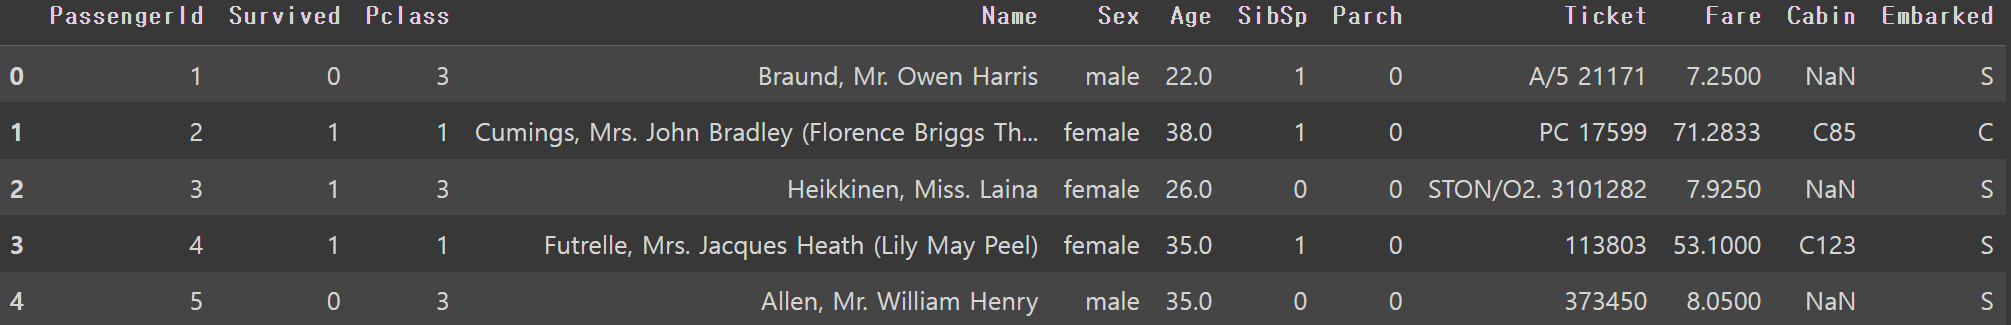

In [ ]:
train.shape

데이터의 행과 열을 출력한다 891행에 12열이 있다

In [ ]:
test.head()

마찬가지로 test 데이터도 확인한다

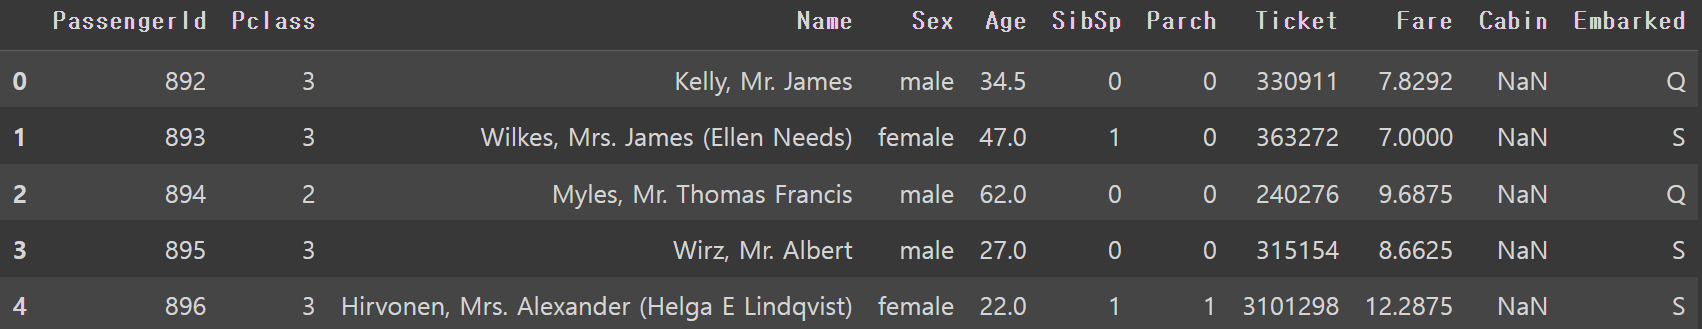

In [ ]:
test.shape

데이터의 행과 열을 출력한다 418행에 11열이 있다. 예측해야할 값인 Survived가 없기 때문이다

In [ ]:
submission.head()

마찬가지로 submission 데이터도 확인한다

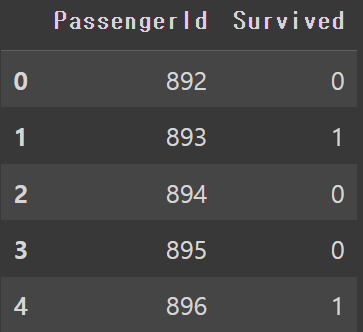

In [ ]:
submission.shape

데이터의 행과 열을 출력한다 418행에 2열이 있다. 기본 예측 목표인 Passengerid와 예측해야할 값인 Survived만 있다

### 각 데이터 확인

PassengerId: 탑승객 번호

Survived: 생존여부 (생존 1, 사망 0)

Pclass: 객실 등급

Name: 승객 이름

Sex: 성별

Age: 나이

SibSp: 배우자 동행 여부

Parch: 부모와 함께 탑승한 어린이 수

Ticket: 티켓 번호

Fare: 티켓 구매 비용

Cabin: 객실 이름

Embarked: 탑승한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

### 칼럼 정보 확인

In [ ]:
train.info(show_counts=True)

이 코드는 칼럼 정보를 대략적으로 알려준다

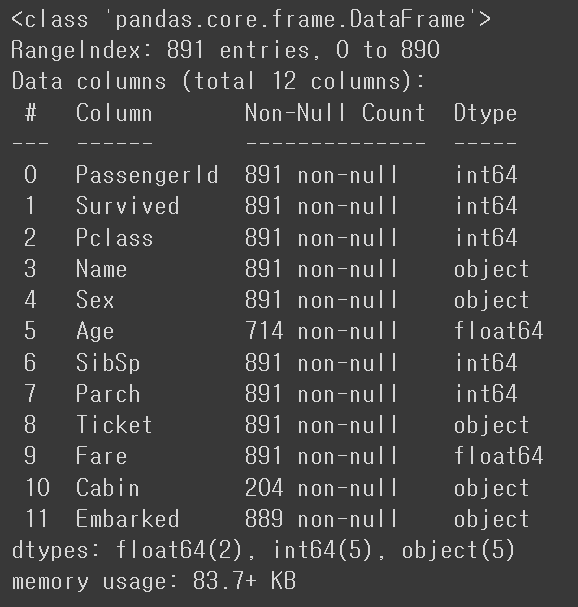

### 칼럼 통계치 확인

In [ ]:
round(train.describe(), 2)

이 코드는 칼럼 통계치를 소숫점 아래 둘째 자리 까지만 표시하게 해준다

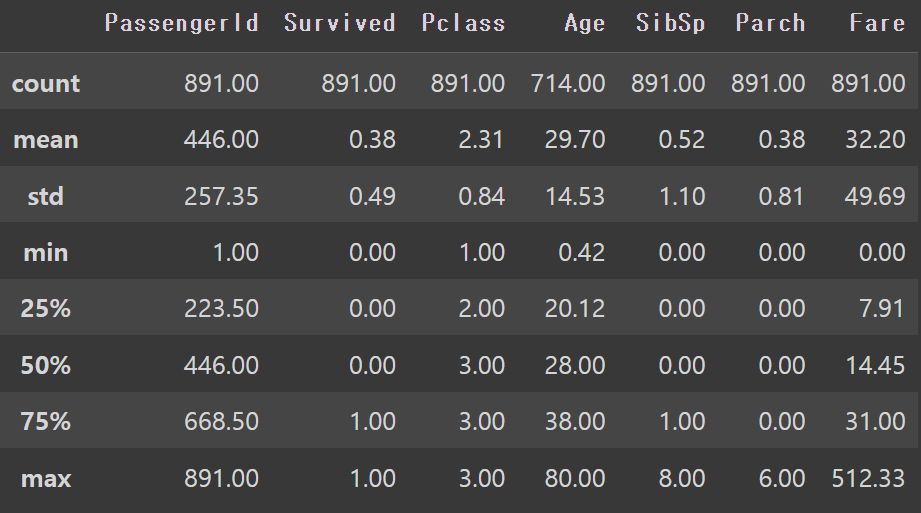

sibSP의 max값을 보면 배우자 동행여부가 0아니면 1로 표현되는 이진피처인데 8로 되어있는 것이 보인다 이상치가 있다

### 결측치 개수 확인

In [ ]:
train.isna().sum()

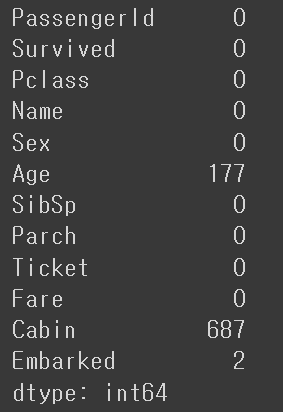

몇몇 피처에 결측값이 있는 것이 보인다

### 결측값이 아닌 빈 문자열이 있는지 확인

In [ ]:
def is_emptystring(x):
    return x.eq('').any()

train.apply(lambda x : is_emptystring(x))

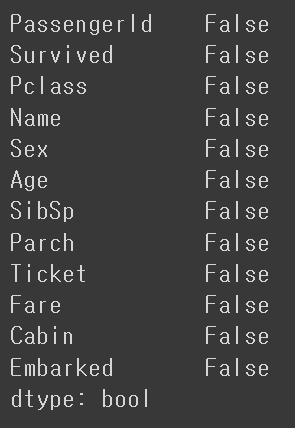

## 2. 데이터 시각화

### 피처 엔지니어링

In [ ]:
Sex_df = train[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived']).count().unstack()

Pclass_df = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().unstack()

Embarked_df = train[['Embarked', 'Survived', 'PassengerId']].groupby(['Embarked', 'Survived']).count().unstack()

Age_df = [train.Age[train.Survived == 0], train.Age[train.Survived == 1]]

Sex_df = train[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived']).count().unstack() :

train[['Sex', 'Survived', 'PassengerId']]:

train 데이터프레임에서 Sex, Survived, PassengerId 열만을 선택한다


2..groupby(['Sex', 'Survived']):

선택된 데이터프레임을 성별(Sex)과 생존 여부(Survived)에 따라 그룹화합니다

즉, 각 성별과 생존 여부 조합에 따라 데이터를 그룹화한다


3..count():

각 그룹에 속하는 PassengerId의 개수를 센다

이는 각 성별과 생존 여부 조합에 해당하는 승객 수를 의미한다


4..unstack():

그룹화된 결과를 더 읽기 쉽게 만들기 위해 피벗 테이블 형태로 변환한다

이 경우, Survived 값(0 또는 1)이 열로 전환되어, 각 성별에 대해 생존 여부에 따른 승객 수를 보여준다

결국 Sex_df는 성별(Sex)과 생존 여부(Survived)에 따른 승객 수를 나타내는 데이터프레임

Pclass_df, Embarked_df도 비슷한 맥락

Age_df = [train.Age[train.Survived == 0], train.Age[train.Survived == 1]]

1.train.Age[train.Survived == 0]:

train 데이터프레임에서 Survived 값이 0인, 즉 생존하지 못한 사람들의 나이(Age)를 선택한다

train.Age[train.Survived == 1]:


이 부분은 train 데이터프레임에서 Survived 값이 1인, 즉 생존한 사람들의 나이(Age)를 선택한다


Age_df는 두 개의 배열을 포함하는 리스트가 되어 생존자와 사망자를 따로 저장한다

### 그래프 그리기

In [ ]:
def plot_bar(ax, df, title, xlabel, ylabel, xticks_rotation=0, colors=['blue', 'red']):
    df.plot.bar(stacked=True, ax=ax, color=colors)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(['Not Survived', 'Survived'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=xticks_rotation)

# 그리드 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 15), squeeze=False)  # 3행, 2열의 그리드 생성

# 첫 번째 그래프: 성별에 따른 생존자 수
plot_bar(axs[0, 0], Sex_df, 'Number of Passengers by Sex and Survival', 'Sex', 'Number of Passengers')

# 두 번째 그래프: 객실 등급에 따른 생존자 수
plot_bar(axs[0, 1], Pclass_df, 'Number of Passengers by Pclass and Survival', 'Pclass', 'Number of Passengers')

# 세 번째 그래프: 탑승 항구에 따른 생존자 수
plot_bar(axs[1, 0], Embarked_df, 'Number of Passengers by Embarked and Survival', 'Embarked', 'Number of Passengers')

# 네 번째 그래프: 연령별 생존자 수
axs[1, 1].hist(Age_df, bins=8, stacked=True, color=['blue', 'red'])
axs[1, 1].set_title('Number of Passengers by Age and Survival')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Number of Passengers')
axs[1, 1].legend(['Not Survived', 'Survived'])

plt.tight_layout()  # 그래프 간의 적절한 간격 자동 조정
plt.show()

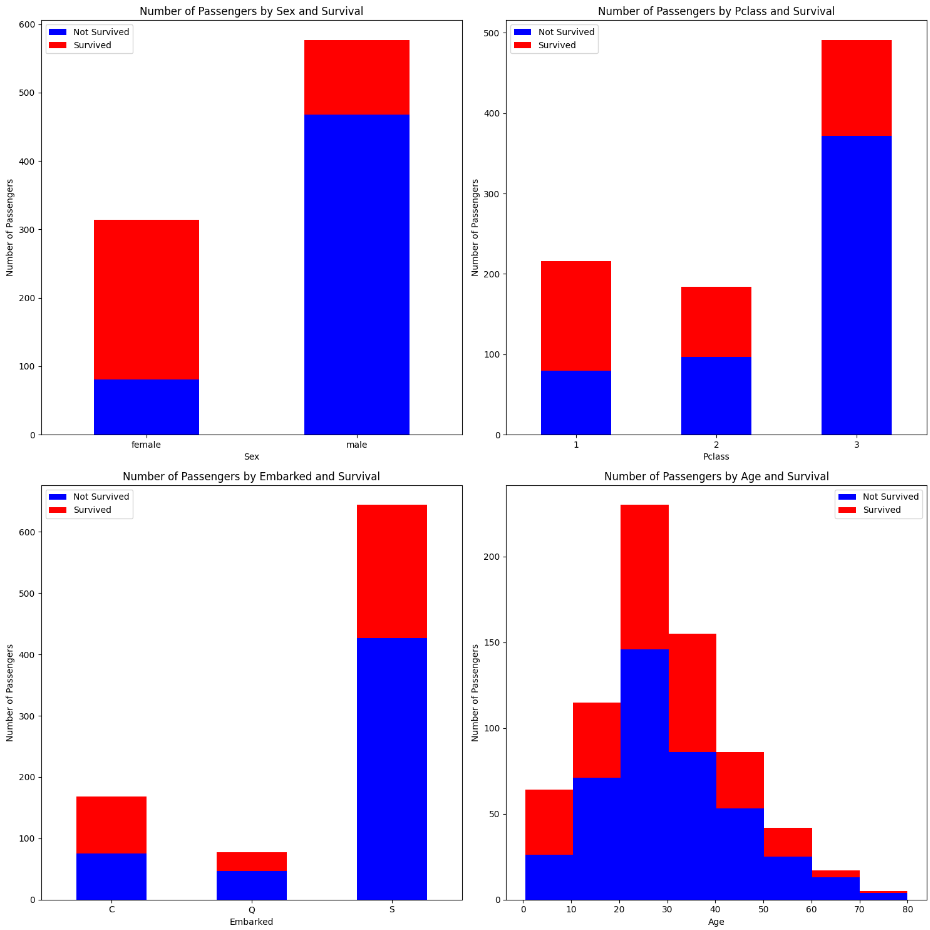

1 ~ 3번째는 막대그래프, 4번째는 히스토그램으로 표현했다

막대그래프는 각 변수의 수치를 나타내기 좋고 히스토그램은 연속형 변수의 수치 비교를 나타내기 좋다

그래프를 살펴보면 대부분 생존자들의 분포 상황을 알 수 있다 1등석 칸인 사람들, 여성, 어린 아이들의 생존자 분포가 높다 실제 우리가 알고있는 그 역사와 같다

### 데이터 인코딩

원래는 전처리 단계에서 해야하는 인코딩이지만 우리는 상관성 분석을 할 예정이기 때문에 문자형 변수들을 인코딩하여 각 고유값마다 다른 숫자형으로 바꿔준다

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in train:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])

### 피처 상관성 시각화

In [ ]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(10,10))

sns.heatmap(train.corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

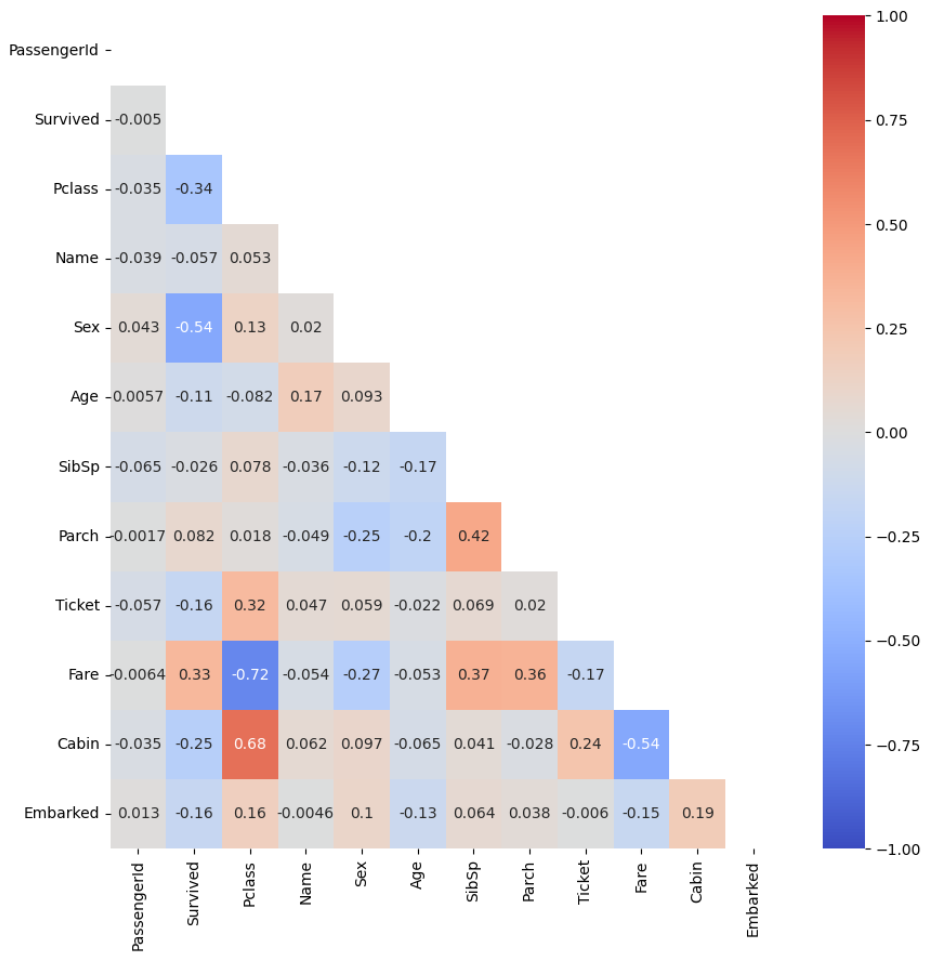

In [ ]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

이 코드를 사용하면 중복된 값을 없애고 히트맵의 반만 사용할 수 있다
'시각화 정리는 차후 할 계획'

상관성은 각 피처들이 얼마나 서로 얼마나 많은 영향을 끼치는지 판단하는 요소인데
의외로 Age칼럼이 별 영향을 끼치지 않는 것을 알 수 있다

## 3. 데이터 전처리

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

train = train.drop(columns=['Cabin'])

train['Embarked'] = train['Embarked'].fillna('S')

Age 피처는 탑승객의 평균 연령대로 조절하였다

cabin피처는 결측치 수가 너무 많기도 하고 방 이름이기 때문에 생존과는 연관성이 적을 것이라 판단하여 제거 하였다

Embarked 피처는 결측치 수가 2개인데, 탑승항구가 S가 압도적으로 많아 S를 결측치로 채웠다

### 결측치 처리 후 상관성 분석


In [ ]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(10,10))

sns.heatmap(train.corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

코드 구성은 저번 포스트 데이터 시각화와 동일하다

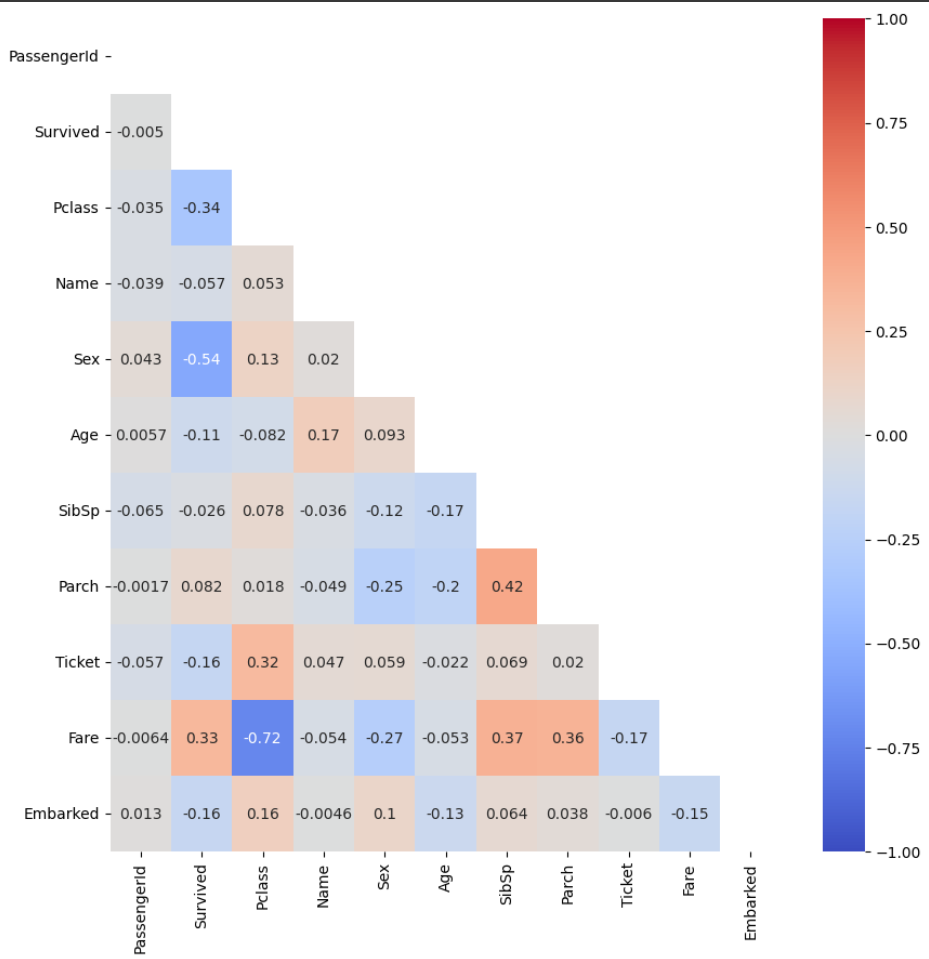

### 탐색 결과 필요없는 피처 제거

In [ ]:
train = train.drop(columns=['Name', 'Ticket', 'Embarked', 'SibSp', 'Parch','Age'])

상관성 분석 등 결과 예측 목표에 별 의미없는 것으로 판단되는 데이터들을 제거한다

### 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split   

X = train.drop('Survived', axis = 1) 
y = train['Survived'] 

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)

train 데이터를 나눈다 나누는 이유는 트레이닝 파일 안에서도 시뮬레이션을 돌려보며 현재 모델이 얼마나 정확도를 가지는지 체크하기 위해서이다

답안지는 선생님이 가져가고 내가 문제를 풀어보고 몇개 맞았는지 나중에 체크하는 것과 같은 개념
Survived피처가 곧 위 설명의 답안지와 같으므로 y 변수로 압수(???ㅋㅋ)한다

### 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)     
X_val = scaler.transform(X_val)   

머신러닝모델은 다른 피처여도 숫자가 크거나 작으면 영향을 받는다

예) 이진분류는 0, 1로 나뉘어 지는데 고윳값이 많은 경우 0부터 언제까지 숫자가 나올지 모른다.

그래서 스케일링을 통해 숫자를 일정 범위내로 조절해준다

여기서는 로버스트 스케일링 방법을 선택하였다

이론적으로는 표준화 스케일링이 더 좋은 방법이다

0과 1 사이로 고르게 분포시키기 때문이다

그런데 신기하게 이상치의 영향력을 그대로 유지하는 로버스트 스케일링의 효과가 더 좋게 나온다 

왜냐하면 이상치가 있던 피처는 이미 제거하였기 때문이다

### 데이터 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2, random_state=0)

oversample = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


X_train =X_train_over
y_train =y_train_over

오버샘플링은 쉽게 말해 타겟값(Survived)의 분포가 불균형할 때, 학습이 한 쪽으로 치우칠지도 모르는 상황에서 동등한 입장에서 학습될 수 있도록 타겟값의 적은 부분을 부풀리면서 높은 부분과 갯수를 맞추는 것이다

이진분류처럼 2가지의 값이 있고 양쪽 분포가 불균형한 상황에서 유용하다

## 4. 데이터 모델링

### 필요한 패키지 설치

In [ ]:
!pip install scikit-optimize
!pip install catboost

!pip install scikit-optimize:
scikit-optimize는 머신 러닝 모델의 파라미터 최적화를 돕는 라이브러리

!pip install catboost :
Catboost 설치

### 필요한 패키지 임포트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier :

랜덤포레스트 분류 모델


from sklearn.svm import SVC :

서포트 벡터 머신 분류 모델


from sklearn.linear_model import LogisticRegression

로지스틱회귀 모델


from skopt import BayesSearchCV

베이지안 최적화


from skopt.space import Real, Categorical, Integer

scikit-optimize 라이브러리에서 하이퍼파라미터 공간을 정의하기 위해 사용하는 클 래스들을 불러오는 코드



import xgboost as xgb

XGBoost 모델


import lightgbm as lgb

Lgbm 모델


from catboost import CatBoostClassifier

CatBoost 분류모델


from sklearn.model_selection import StratifiedKFold

층화 K-fold교차검증

### 하이퍼 파라미터 공간 정의

In [ ]:
search_spaces = {
    '랜덤포레스트 분류': { 'model': RandomForestClassifier(),
                            'params': {'n_estimators': Integer(100, 500),
                            'max_depth': Integer(1, 50),
                            'min_samples_split': Real(0.01, 0.1)}},

    '로지스틱회귀 분류': {'model': LogisticRegression(),
                            'params': {'C': Real(1e-6, 1e+6, prior='log-uniform')}},

    'XGBoost': {'model': xgb.XGBClassifier(),
                'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'min_child_weight': Integer(1, 10),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0)}},

    'LightGBM': {'model': lgb.LGBMClassifier(verbose=-1),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'num_leaves': Integer(2, 128),
                            'min_child_samples': Integer(1, 100),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0),
                            'objective': Categorical(['binary']),
                            'is_unbalance': Categorical([True, False]),
                            'reg_alpha': Real(0.0, 1.0),
                            'reg_lambda': Real(0.0, 1.0),
                            'max_bin': Integer(200, 300),
                            'min_split_gain': Real(0.0, 0.1),
                            'subsample_freq': Integer(1, 10),
                            'feature_fraction': Real(0.5, 1.0)}},

    'CATboost': {'model': CatBoostClassifier(verbose=False),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'depth': Integer(4, 10),
                            'l2_leaf_reg': Real(1, 10),
                            'iterations': Integer(100, 1000),
                            'border_count': Integer(32, 255)}},

        'svc': {'model': SVC(),
            'params': {'C': Real(1e-6, 1e+6, prior='log-uniform'),
                        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
                        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid'])}}
}

어떤 모델이 가장 좋을까?? 가장 확실한 방법! 모델 별로 파라미터 공간을 정의하고 일일이 돌려보며 찾는 것이다 ㅋㅋㅋㅋ

In [ ]:
best_models = {}

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, config in search_spaces.items():
    optimizer = BayesSearchCV(
        estimator=config['model'],
        search_spaces=config['params'],
        n_iter=20,
        cv=stratified_k_fold,
        n_jobs=-1,
        scoring='accuracy'
    )
    optimizer.fit(X, y)

    best_models[model_name] = optimizer.best_estimator_

    print(f'{model_name}')
    print(f'최적 파라미터: {optimizer.best_params_}')
    print(f'점수: {optimizer.best_score_}')

그리드서치라는 방법을 사용하면 가장 좋은 값을 찾을 수 있으나 일일이 하나하나 다 해보는 방법이라 제일 오래걸려 베이지안 최적화 방법(optimizer = BayesSearchCV)을 사용해 랜덤으로 돌려본 값 중 제일 큰 값을 표출해주는 방법을 선택했다

돌려본 결과 lgbm이 가장 성능이 좋아 lgbm으로만 다시 20회 실행(n_iter=20)해보고 가장 좋은 값으로 출력했다

높은 점수를 나타내는 기준은 그때그때 바꿀 수 있는데, 정확도를 평가하므로 정확도로 평가했다(scoring='accuracy')

### 모델 학습

그렇게해서 나온 가장 좋은 값이 나왔다

LightGBM
최적 파라미터: OrderedDict([('colsample_bytree', 0.9478035148718638), ('feature_fraction', 0.9939732626227341), ('is_unbalance', False), ('learning_rate', 0.021913991594702815), ('max_bin', 237), ('max_depth', 14), ('min_child_samples', 3), ('min_split_gain', 0.09487632325388512), ('n_estimators', 94), ('num_leaves', 122), ('objective', 'binary'), ('reg_alpha', 0.5729379348747674), ('reg_lambda', 0.7089354424863308), ('subsample', 0.7698183331097158), ('subsample_freq', 5)])
점수: 0.8204004770573097

이제 이 파라미터 값으로 훈련시켜준다

In [ ]:
best_params = optimizer.best_params_
model = lgb.LGBMClassifier(**best_params, verbose=-1)


model.fit(X_train, y_train)

이 코드는 내가 일일이 반영해주지 않아도 최적파라미터로 찾은 값으로 바로 학습을 시켜주도록 하는 코드이다

대신 lgb.LGBMClassifier(**best_params, verbose=-1) 이 부분에서 lgb.LGBMClassifier 이 부분은 더 좋은 점수가 나오는 모델이 있다면 바꿔줘야한다

preds = model.predict(X_val)

X_val값에 모델을 예측시켜주면 y_val값에 값이 저장될 것이다

## 5. 모델 평가

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 혼동행렬과 분류 보고서 출력
print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

# ROC 커브와 AUC 계산
fpr, tpr, thresholds = roc_curve(y_val, preds)  # preds_proba는 모델이 예측한 확률입니다. 이진 분류에서는 양성 클래스에 대한 확률을 사용해야 합니다.
roc_auc = roc_auc_score(y_val, preds)  # ROC AUC 점수 계산

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

분류 모델에서 이 평가표를 사용하면 혼동행렬과 정확도, 재현율, F1스코어 등 다른 점수도 볼 수 있으며 Roc-Auc곡선도 볼 수 있다



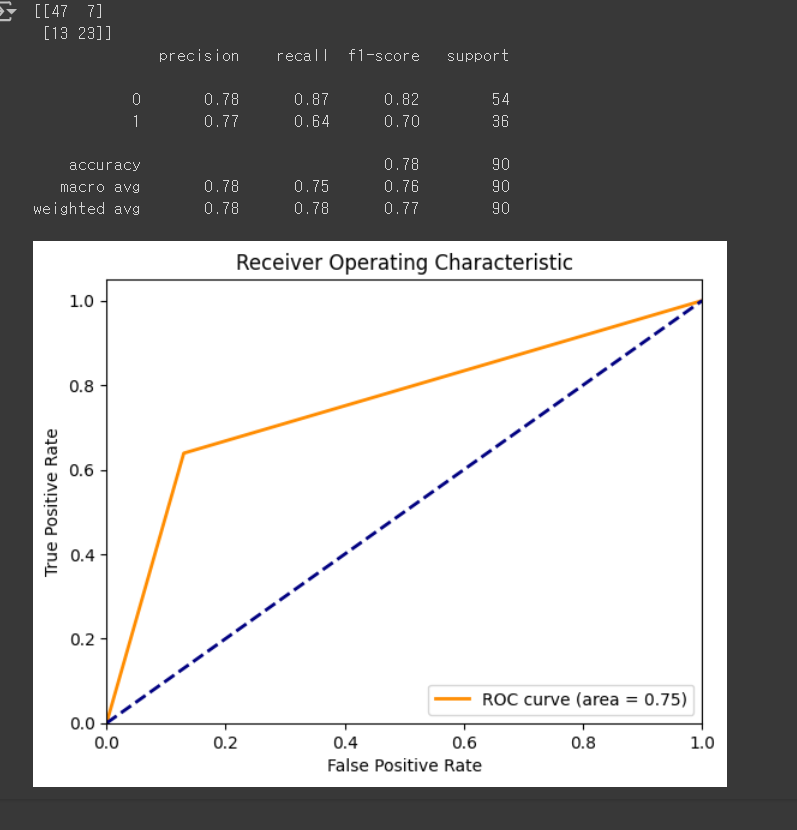

정확도는 80프로가 넘는다지만 저 삐져나온 선이 마음에 들지않는다 (결벽증)

## 6. 최종 예측

### 테스트 파일 로드 및 전처리

In [ ]:
for column in test:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])

test['Age'] = test['Age'].fillna(test['Age'].mean())

test = test.drop(columns=['Cabin'])

test['Embarked'] = test['Embarked'].fillna('S')

test = test.drop(columns=['Name', 'Ticket', 'Embarked', 'SibSp', 'Parch','Age'])

rb_scaler = RobustScaler()

test_scaled = rb_scaler.fit_transform(test)  

test = pd.DataFrame(test_scaled, columns=test.columns)

test 파일도 train 파일과 마찬가지로 전처리 해준다 

### 모델 추론

전처리한 테스트를 이미 만들어놓은 모델로 예측시킨다

In [ ]:
preds = model.predict(test)

### 제출 파일 만들기

In [ ]:
submission["Survived"] = preds
submission.head()

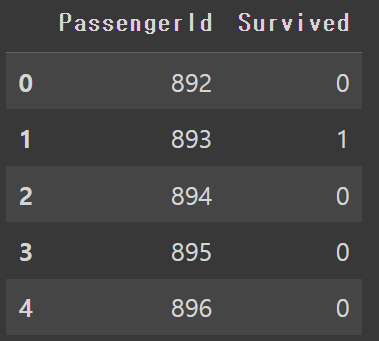

이렇게 예측된 것을 볼 수 있다

In [ ]:
submission.to_csv("/content/drive/MyDrive/프로젝트/캐글/타이타닉/submission.csv", index=False)

이렇게 파일을 저장해주고 캐글에 제출하면 끝!

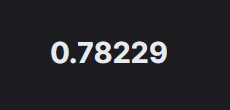

점수는 이렇게 나왔다 (처음치곤 나쁘지않았다....! 하지만 만족하면 안돼)

## 후기

지금 이 블로그에는 일사천리로 진행한 것 같지만 공부하면서 혼자 생각했을 때 정해져있는 가이드라인이 있으면 어떤 과제를 분석하든 편하겠다 라는 생각에 시간을 거의 열흘 가까이 소비하여 연구하고 gpt의 힘도 빌린 끝에 데이터 기본 분석 템플릿을 만들었다

하지만 아직 갈길이 멀다 어떻게든 이것저것 해보며 점수를 올린다 치더라도 기본 배경지식을 알고 내가 이 기법을 왜 사용하는지 등등을 이유를 모르고 쓰면 의미가 없다 아마 나중에 취업할 때 면접볼때도 된 통 당할수도 있겠다

제일 어려웠던건 시각화를 어떤 방식으로 해야할까, 어떤 모델을 써야할까에 대한 고민을 많이 했다

모델을 어떻게 쓸까를 고민한 끝에 모델링 방법에서 사용한 여러가지 대표 분류 모델의 하이퍼 파라미터 경우의 수를 다 지정하고, 그 안에서 베이지안 파라미터를 이용하여 랜덤으로 선별한 다음, 가장 잘 나온 모델을 사용하는 방식을 채택했다
나는 이 방법을 이용하여 이미 사용하고 있어서 나는 살짝 너무 노가다인가 라고 생각했는데 부트캠프 현직자 멘토님께서 이런 방법을 코드만 다르고 접근법이 나와 완전 같은 방법을 소개해주셔서 역시 나는 얼리어답터(ㅋㅋㅋ)라고 생각했다

앙상블을 사용하면 여러가지 모델들을 겹쳐 사용함으로써 더 좋은 성과를 이룰 수 있다고 한다. 아직 많이 부족하여 책을 보며 캐글 경진대회에 따라서 쳐보는 식으로 공부해볼 예정인데 앙상블에 대한 내용까지 진도를 나가 숙지하게 되면 적극적으로 사용해보겠다.